# Lecture 3: Logistic Regressions

Here, we'll see examples of how to use the scikit-learn logistic regression class, as well as the statsmodels GLM function, which is much more similar to R's glm function for doing logistic regression.

You can read about the scikit-learn logistic regression function here:

[http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# sklearn.metrics has a bunch of really handy evaluation functions
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn import datasets
import seaborn as sns

Let's load the famous iris dataset, which has measured features of different species of iris:

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

The three species are coded as 0, 1, 2:

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The features are length and width measurements of different parts of the iris ([http://irisabramson.com/wp-content/uploads/2014/10/iris_petal_sepal.png](http://irisabramson.com/wp-content/uploads/2014/10/iris_petal_sepal.png)):

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let's make a dataset which is only the first two predictors, so that we can visualize the decision boundaries:

In [8]:
X = iris.data[:, :2]
y = iris.target

Let's construct and fit our scikit-learn classifier, which should follow the by-now-familiar workflow of construct, fit, predict that we saw with k-nearest neighbors and linear regression:

In [10]:
# construct a linear regression model with no regularization
logit = LogisticRegression(C=1e5)

In [11]:
logit.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [13]:
training_preds = logit.predict(X)
training_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [14]:
training_probs = logit.predict_proba(X)
training_probs

array([[  9.05823905e-01,   6.81672013e-02,   2.60088939e-02],
       [  7.64631786e-01,   2.16376590e-01,   1.89916235e-02],
       [  8.46908157e-01,   1.42190177e-01,   1.09016662e-02],
       [  8.15654921e-01,   1.75608861e-01,   8.73621791e-03],
       [  9.29624966e-01,   5.11184180e-02,   1.92566160e-02],
       [  9.35726243e-01,   2.14566456e-02,   4.28171113e-02],
       [  9.06375214e-01,   8.58410376e-02,   7.78374790e-03],
       [  8.90004223e-01,   8.86750246e-02,   2.13207520e-02],
       [  7.44055159e-01,   2.50433077e-01,   5.51176369e-03],
       [  8.02826805e-01,   1.78629207e-01,   1.85439881e-02],
       [  9.12881392e-01,   3.90028926e-02,   4.81157159e-02],
       [  8.99673219e-01,   8.73972775e-02,   1.29295031e-02],
       [  7.69594524e-01,   2.15588498e-01,   1.48169774e-02],
       [  7.86468274e-01,   2.09354239e-01,   4.17748690e-03],
       [  8.85195466e-01,   1.56532847e-02,   9.91512491e-02],
       [  9.32634691e-01,   4.55482910e-03,   6.2810479

In [15]:
np.where(training_preds!=y)

(array([ 50,  51,  52,  54,  56,  58,  65,  70,  74,  75,  76,  77,  85,
         86,  91,  97, 101, 106, 113, 114, 119, 121, 123, 126, 134, 138,
        142, 146, 149]),)

In [16]:
num = 50
print(y[num])
print(training_probs[num])

1
[  8.72446141e-22   2.06253776e-01   7.93746224e-01]


### Evaluating the Classifier Performance

At the very top, we imported several functions from sklearn.metrics ([http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)):

In [17]:
?confusion_matrix

In [18]:
confusion_matrix(y, training_preds)

array([[50,  0,  0],
       [ 0, 34, 16],
       [ 0, 13, 37]])

We can also use the crosstab function in pandas, which has the advantage that it's clear which are rows and which are columns:

In [19]:
pd.crosstab(index=y, columns=training_preds, rownames=['True'], colnames=['Predicted'])

Predicted,0,1,2
True,,,
0,50,0,0
1,0,34,16
2,0,13,37


In [20]:
print(accuracy_score(y, training_preds))

0.806666666667


The `classification_report` function will easily give us some other metrics:

In [21]:
print(classification_report(y, training_preds, labels=[0,1,2], target_names=['class 0', 'class 1', 'class 2']))

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        50
    class 1       0.72      0.68      0.70        50
    class 2       0.70      0.74      0.72        50

avg / total       0.81      0.81      0.81       150



To make an ROC curve, let's simplify things and train a binary version rather than a multi-class version of the classifier:

In [22]:
y_bin = (y==2).astype("int")

logit_binary = LogisticRegression(C=1e5)
logit_binary.fit(X, y_bin)

bin_preds = logit_binary.predict_proba(X)[:, 1]

The `roc_curve` function returns three arrays.  One for the false positive rate, one for the true positive rate, and one for the probability thresholds that correspond to each point:

In [23]:
fpr, tpr, thresholds = roc_curve(y_bin, bin_preds)

In [24]:
thresholds

array([ 0.98049838,  0.86671432,  0.83873714,  0.81196618,  0.80620055,
        0.75549093,  0.73427835,  0.71952174,  0.69644247,  0.6885596 ,
        0.65574497,  0.62144653,  0.62137407,  0.61262609,  0.59484136,
        0.5858889 ,  0.58581417,  0.57672897,  0.53087141,  0.52164216,
        0.4658706 ,  0.44742542,  0.43829153,  0.4200795 ,  0.40200848,
        0.3842727 ,  0.36683938,  0.35828393,  0.3247944 ,  0.30870657,
        0.26317598,  0.25606043,  0.24907224,  0.24901464,  0.23537189,
        0.22877468,  0.22872034,  0.21586985,  0.19176287,  0.16456859,
        0.15950055,  0.15459995,  0.14056012,  0.1361472 ,  0.06734736,
        0.06502151,  0.04741599,  0.04575816,  0.03693718,  0.03562144,
        0.0308607 ,  0.02871297,  0.02396299,  0.02395579,  0.02309832,
        0.02227755,  0.02071439,  0.01925294,  0.01490073,  0.01287231,
        0.0053117 ])

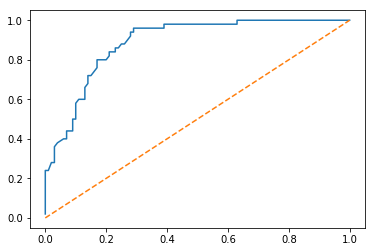

In [25]:
# we want to draw the random baseline ROC line too
fpr_rand = tpr_rand = np.linspace(0, 1, 10)

plt.plot(fpr, tpr)
plt.plot(fpr_rand, tpr_rand, linestyle='--')
plt.show()

And we can easily calculate the AUC:

In [26]:
roc_auc_score(y_bin, bin_preds)

0.88730000000000009

We can also plot cumulative gains and lift curves, though we have to calculate them by hand:

In [27]:
# get scores ordered from highest to lowest
order = np.argsort(bin_preds)
# this notation means go from beginning to end by -1, which is reverse order
decreasing_order = order[::-1]

In [28]:
bin_preds[decreasing_order]

array([ 0.98049838,  0.97744239,  0.97392025,  0.97197219,  0.9664242 ,
        0.95370779,  0.95201752,  0.93419726,  0.91038171,  0.8974869 ,
        0.8867466 ,  0.86671432,  0.83873714,  0.81196618,  0.81196618,
        0.81196618,  0.80620055,  0.80035083,  0.80030161,  0.78190662,
        0.75549093,  0.73427835,  0.73427835,  0.71952174,  0.71952174,
        0.71952174,  0.69644247,  0.6885596 ,  0.6885596 ,  0.68049895,
        0.65574497,  0.62144653,  0.62144653,  0.62144653,  0.62137407,
        0.61262609,  0.59484136,  0.59484136,  0.5858889 ,  0.58581417,
        0.58581417,  0.57680416,  0.57672897,  0.54933675,  0.5401561 ,
        0.53087141,  0.52164216,  0.52164216,  0.51232115,  0.4658706 ,
        0.44742542,  0.44734927,  0.44734927,  0.43829153,  0.43829153,
        0.4382157 ,  0.4200795 ,  0.40200848,  0.40200848,  0.3842727 ,
        0.36683938,  0.36683938,  0.35828393,  0.35821311,  0.3247944 ,
        0.30870657,  0.26317598,  0.25606043,  0.25606043,  0.24

In [29]:
total_ones = y_bin.sum()
num_examples = len(y_bin)
percent_ones = float(total_ones)/float(num_examples)
print("We have %s total 1's out of %s training examples." % (total_ones, num_examples))

percent_targeted = np.linspace(0, 1, 100)

rands, cums = [], []
for p in percent_targeted:
    # for random targeting, we just get a constant fraction
    rands.append(p*percent_ones)
    
    # for a real model, we take the p percent highest scorers
    # and see how many ones there are
    n_ones = y_bin[decreasing_order[:int(p*num_examples)]].sum()
    cums.append(float(n_ones)/float(num_examples))
    
# when we're done, calculate lift too
lifts = np.array(cums)/np.array(rands)

We have 50 total 1's out of 150 training examples.


<function matplotlib.pyplot.show>

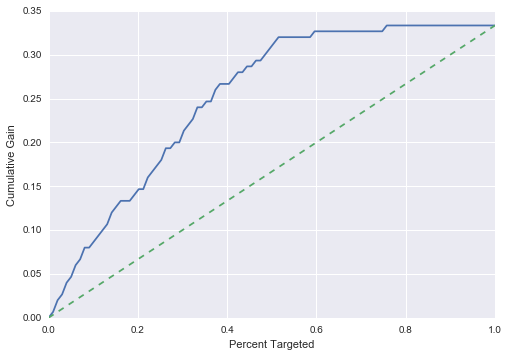

In [30]:
plt.plot(percent_targeted, cums)
plt.plot(percent_targeted, rands, linestyle='--')
plt.xlabel('Percent Targeted')
plt.ylabel('Cumulative Gain')
plt.show

<function matplotlib.pyplot.show>

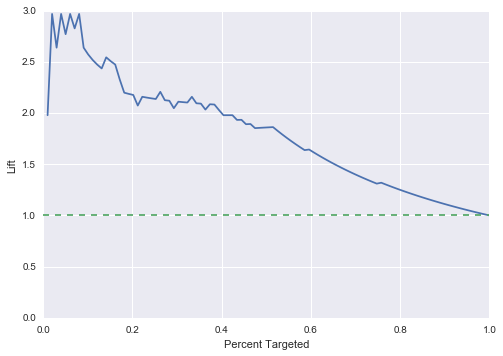

In [31]:
plt.plot(percent_targeted, lifts)
plt.plot(percent_targeted, np.ones(percent_targeted.shape), linestyle='--')
plt.ylim(0, 3)
plt.xlabel('Percent Targeted')
plt.ylabel('Lift')
plt.show

### Visualizing the Decision Boundary

Let's visualize what the logistic regression classifier is doing by constructing a fine 2-D mesh in the 2-D feature space and predicting the output at each value:

In [32]:
# step size of the mesh
h = .02
# range of the mesh
x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5

x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

In [33]:
# ravel is the same as reshape(-1), which we saw last week
all_preds = logit.predict(np.column_stack((xx0.ravel(), xx1.ravel())))

In [34]:
grid_preds = all_preds.reshape(xx0.shape)

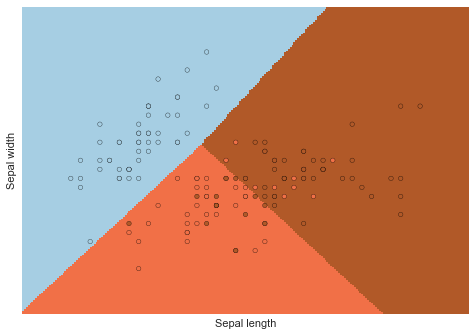

In [35]:
plt.pcolormesh(xx0, xx1, grid_preds, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx0.min(), xx0.max())
plt.ylim(xx1.min(), xx1.max())
plt.xticks(())
plt.yticks(())

plt.show()

Let's see what happens if we add quadratic features and an interaction term:

In [36]:
X_expanded = np.column_stack((X, X**2, X[:, 0]*X[:, 1]))
X_expanded

array([[  5.1 ,   3.5 ,  26.01,  12.25,  17.85],
       [  4.9 ,   3.  ,  24.01,   9.  ,  14.7 ],
       [  4.7 ,   3.2 ,  22.09,  10.24,  15.04],
       [  4.6 ,   3.1 ,  21.16,   9.61,  14.26],
       [  5.  ,   3.6 ,  25.  ,  12.96,  18.  ],
       [  5.4 ,   3.9 ,  29.16,  15.21,  21.06],
       [  4.6 ,   3.4 ,  21.16,  11.56,  15.64],
       [  5.  ,   3.4 ,  25.  ,  11.56,  17.  ],
       [  4.4 ,   2.9 ,  19.36,   8.41,  12.76],
       [  4.9 ,   3.1 ,  24.01,   9.61,  15.19],
       [  5.4 ,   3.7 ,  29.16,  13.69,  19.98],
       [  4.8 ,   3.4 ,  23.04,  11.56,  16.32],
       [  4.8 ,   3.  ,  23.04,   9.  ,  14.4 ],
       [  4.3 ,   3.  ,  18.49,   9.  ,  12.9 ],
       [  5.8 ,   4.  ,  33.64,  16.  ,  23.2 ],
       [  5.7 ,   4.4 ,  32.49,  19.36,  25.08],
       [  5.4 ,   3.9 ,  29.16,  15.21,  21.06],
       [  5.1 ,   3.5 ,  26.01,  12.25,  17.85],
       [  5.7 ,   3.8 ,  32.49,  14.44,  21.66],
       [  5.1 ,   3.8 ,  26.01,  14.44,  19.38],
       [  5.4 ,   3.

In [37]:
logit2 = LogisticRegression(C=1e5)
logit2.fit(X_expanded, y)
training_preds_2 = logit2.predict(X_expanded)

x0_flat = xx0.ravel()
x1_flat = xx1.ravel()
stacked = np.column_stack((x0_flat, x1_flat, x0_flat**2, x1_flat**2, x0_flat*x1_flat))

all_preds_2 = logit2.predict(stacked)
grid_preds_2 = all_preds_2.reshape(xx0.shape)

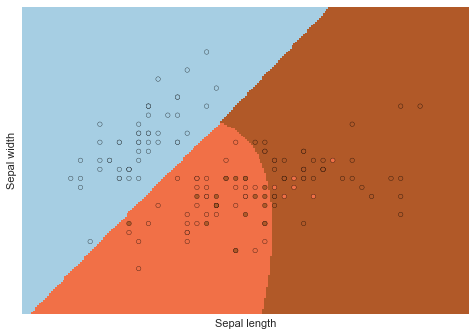

In [38]:
plt.pcolormesh(xx0, xx1, grid_preds_2, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx0.min(), xx0.max())
plt.ylim(xx1.min(), xx1.max())
plt.xticks(())
plt.yticks(())

plt.show()

In terms of training set accuracy, we do a little bit better, but it's unlikely this quadratic decision boundary would be better on an independent training set:

In [39]:
print(accuracy_score(y, training_preds))
print(accuracy_score(y, training_preds_2))

0.806666666667
0.813333333333


In [40]:
pd.crosstab(index=y, columns=training_preds, rownames=['True'], colnames=['Predicted'])

Predicted,0,1,2
True,,,
0,50,0,0
1,0,34,16
2,0,13,37


In [41]:
pd.crosstab(index=y, columns=training_preds_2, rownames=['True'], colnames=['Predicted'])

Predicted,0,1,2
True,,,
0,50,0,0
1,0,38,12
2,0,16,34


## Statsmodels

### Using A Formula to Fit to a Pandas Dataframe

[http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm_formula.html](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm_formula.html)

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

The Star98 dataset is an educational dataset from California counties.  The column `NABOVE` represents "the number of 9th graders scoring over the national median value on the mathematics exam."

[http://statsmodels.sourceforge.net/0.6.0/datasets/generated/star98.html](http://statsmodels.sourceforge.net/0.6.0/datasets/generated/star98.html)

In [43]:
star98 = sm.datasets.star98.load_pandas().data

In [44]:
star98.head()

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


In [45]:
dta = star98[['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
              'PCTCHRT', 'PCTYRRND', 'PERMINTE', 'AVYRSEXP', 'AVSALK',
              'PERSPENK', 'PTRATIO', 'PCTAF']]
percent_above = dta['NABOVE'] / (dta['NABOVE'] + dta['NBELOW'])

dta = dta.drop(['NABOVE', 'NBELOW'], axis=1, inplace=False)
dta["SUCCESS"] = percent_above>0.5
dta["SUCCESS"] = dta["SUCCESS"].astype("int")
dta.head()

,LOWINC,PERASIAN,PERBLACK,PERHISP,PCTCHRT,PCTYRRND,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,SUCCESS
0,34.39730,23.299300,14.235280,11.411120,0.0,22.222220,15.91837,14.70646,59.15732,4.445207,21.71025,57.03276,1
1,17.36507,29.328380,8.234897,9.314884,0.0,0.000000,13.63636,16.08324,59.50397,5.267598,20.44278,64.62264,1
2,32.64324,9.226386,42.406310,13.543720,0.0,0.000000,28.83436,14.59559,60.56992,5.482922,18.95419,53.94191,1
3,11.90953,13.883090,3.796973,11.443110,0.0,7.142857,11.11111,14.38939,58.33411,4.165093,21.63539,49.06103,1
4,36.88889,12.187500,76.875000,7.604167,0.0,0.000000,43.58974,13.90568,63.15364,4.324902,18.77984,52.38095,0


In [46]:
formula = 'SUCCESS ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT + \
           PCTYRRND + PERMINTE*AVYRSEXP*AVSALK + PERSPENK*PTRATIO*PCTAF'

In [47]:
mod1 = smf.glm(formula=formula, data=dta, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -75.162
Date:                Sun, 06 Aug 2017   Deviance:                       150.32
Time:                        09:23:21   Pearson chi2:                     167.
No. Iterations:                    10                                         
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  103.2251     60.567      1.704      0.088       -15.484   221.934
LOWINC                      -0.1344      0.025     -5.428      0.000        -0.183    -0.086
PERASIAN                     0.1567      0.043      3.662      0.000         0.073     0.241
PERBLACK                    -0.1568      0.051     -3.069      0.002        -0.257    -0.057
PERHISP                     -0.0460      0.021     -2.138      0.033        -0.088    -0.004
PCTCHRT                     -0.0255      0.035     -0.723      0.470        -0.094     0.044
PCTYRRND                    -0.0119      0.012     -1.025      0.306        -0.035     0.011
PERMINTE                    -3.9382      4.239     -0.929      0.353       -12.246     4.369
AVYRSEXP                    -2.6731      3.176     -0.842      0.400        -8.898     3.552
PERMINTE:AVYRSEXP            0.2827      0.294      0.960      0.337        -0.294     0.860
AVSALK                      -0.6330      0.820     -0.772      0.440        -2.240     0.974
PERMINTE:AVSALK              0.0720      0.073      0.981      0.326        -0.072     0.216
AVYRSEXP:AVSALK              0.0492      0.056      0.876      0.381        -0.061     0.159
PERMINTE:AVYRSEXP:AVSALK    -0.0052      0.005     -1.021      0.307        -0.015     0.005
PERSPENK                   -18.6489     11.248     -1.658      0.097       -40.694     3.396
PTRATIO                     -2.8709      2.303     -1.247      0.213        -7.385     1.643
PERSPENK:PTRATIO             0.8320      0.539      1.544      0.123        -0.224     1.888
PCTAF                       -1.8809      1.305     -1.441      0.150        -4.440     0.678
PERSPENK:PCTAF               0.5528      0.304      1.816      0.069        -0.044     1.149
PTRATIO:PCTAF                0.0838      0.061      1.369      0.171        -0.036     0.204
PERSPENK:PTRATIO:PCTAF      -0.0244      0.015     -1.678      0.093        -0.053     0.004
============================================================================================
"""

In [48]:
print(mod1.params)

Intercept                   103.225061
LOWINC                       -0.134375
PERASIAN                      0.156722
PERBLACK                     -0.156807
PERHISP                      -0.045952
PCTCHRT                      -0.025470
PCTYRRND                     -0.011937
PERMINTE                     -3.938244
AVYRSEXP                     -2.673062
PERMINTE:AVYRSEXP             0.282675
AVSALK                       -0.632951
PERMINTE:AVSALK               0.072025
AVYRSEXP:AVSALK               0.049215
PERMINTE:AVYRSEXP:AVSALK     -0.005188
PERSPENK                    -18.648906
PTRATIO                      -2.870892
PERSPENK:PTRATIO              0.832023
PCTAF                        -1.880869
PERSPENK:PCTAF                0.552780
PTRATIO:PCTAF                 0.083849
PERSPENK:PTRATIO:PCTAF       -0.024427
dtype: float64
